In [287]:
# Packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [289]:
# Print more rows and columns of pandas.DataFrame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [288]:
# Change path if needed
path = r'C:\Users\user\Desktop\KUL - Mstat\Big Data Platforms and Technologies\project'
data = pd.read_csv(path + r'\ctrain.csv')

### **<font color='blue'>Exploratory Data Analysis (EDA)</font>**

 **<font color='blue'>Dependent variable: Fraud</font>**
 - <font color='blue'>*Fraud* is highly imbalanced, out of 55463 observations, only 308 of them are classified as fraudulent cases.</font>
 - <font color='blue'>It suggests a need of some resampling techniques.</font>

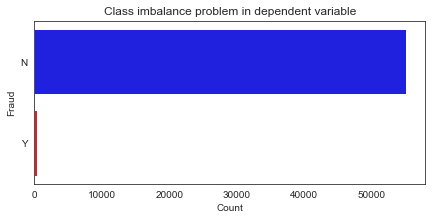

In [66]:
# Countplot for Fraud
sns.set_style('white')
ax = sns.countplot(y = 'fraud', data = data, palette = ['blue', 'red'])
ax.set_title('Class imbalance problem in dependent variable')
ax.set_xlabel('Count')
ax.set_ylabel('Fraud')
fig = ax.get_figure()
fig.set_size_inches(7, 3)
fig.savefig('class_imbal_problem.png', bbox_inches='tight', dpi = 300)

In [67]:
# Statistics
data['fraud'].value_counts()

N    55155
Y      308
Name: fraud, dtype: int64

 **<font color='blue'>Weighting variable: claim_amount</font>**
 - <font color='blue'>The claim amount is highly skewed, most of the claims are associated with a lower monetary value.</font>
 - <font color='blue'>We are interested in fraudulent case with high monetary values, and we observed that fradulent cases are associated with a higher median of claim amount.</font>

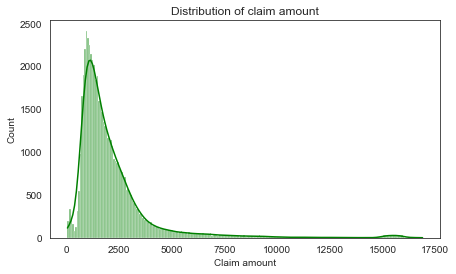

In [68]:
# histogram for claim_amount
sns.set_style('white')
ax = sns.histplot(x = 'claim_amount', data = data, kde = True, color = 'green')
ax.set_title('Distribution of claim amount')
ax.set_xlabel('Claim amount')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_claim_amount.png', bbox_inches = 'tight', dpi = 300)

         count         mean          std    min        25%       50%  \
fraud                                                                  
N      55155.0  2085.272692  1875.893851  30.00  1060.1050  1577.630   
Y        308.0  6556.037792  6017.175534  43.32  1627.3575  3201.655   

             75%      max  
fraud                      
N       2442.205  16000.0  
Y      13641.435  16901.0  


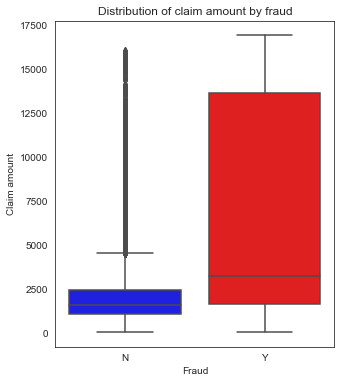

In [69]:
# Distribution of claim amount by fraud
print(data.groupby('fraud')['claim_amount'].describe())

# Visualization in a boxplot
ax = sns.boxplot(x = 'fraud', y = 'claim_amount', data = data, palette = ['blue', 'red'])
ax.set_title('Distribution of claim amount by fraud')
ax.set_xlabel('Fraud')
ax.set_ylabel('Claim amount')
fig = ax.get_figure()
fig.set_size_inches(5, 6)
fig.savefig('dist_claim_amount_by_fraud.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Number of third party involved</font>**
 - <font color='blue'>The number of third parties involved is measured by *claim_num_third_party*. A barplot is constructed as below which shows that most of our cases involved only 1 third party. Some of them do not involve third party, and very few of them involve more than 1 third parties.</font>
 - <font color='blue'>More than 50% of fradulent cases do not involve third party.</font>

count    55463.000000
mean         0.831419
std          0.580161
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: claim_num_third_parties, dtype: float64
fraud                           N         Y
claim_num_third_parties                    
0                        0.245200  0.577922
1                        0.692086  0.392857
2                        0.050077  0.016234
3                        0.009863  0.006494
4                        0.002266  0.006494
5                        0.000508  0.000000


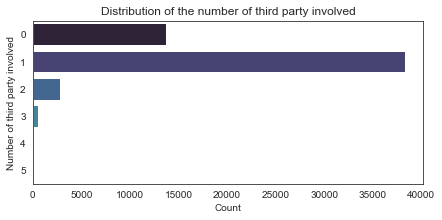

In [70]:
# Distribution of the number of third party involved
print(data['claim_num_third_parties'].describe())

# Distribution by fraud
print(pd.crosstab(data['claim_num_third_parties'], data['fraud'], 
                  normalize = 'columns'))

# Visualization in a barplot
sns.set_style('white')
ax = sns.countplot(y = 'claim_num_third_parties', data = data, palette = 'mako')
ax.set_title('Distribution of the number of third party involved')
ax.set_xlabel('Count')
ax.set_ylabel('Number of third party involved')
fig = ax.get_figure()
fig.set_size_inches(7, 3)
fig.savefig('num_third_party_involved.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Various Age-related variables</font>**

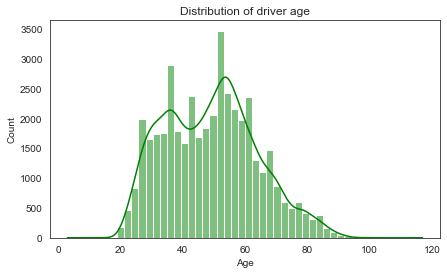

In [71]:
# histogram for driver age
sns.set_style('white')
ax = sns.histplot(x = 'driver_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of driver age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_driver_age.png', bbox_inches = 'tight', dpi = 300)

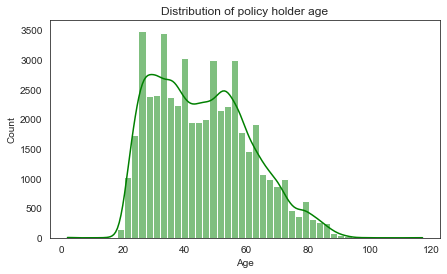

In [72]:
# histogram for policy_holder_age
sns.set_style('white')
ax = sns.histplot(x = 'policy_holder_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of policy holder age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_policy_holder_age.png', bbox_inches = 'tight', dpi = 300)

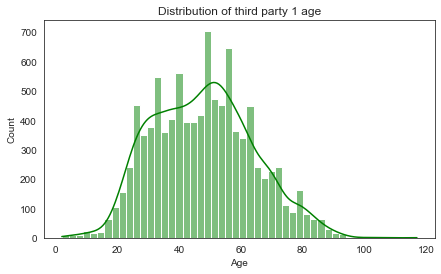

In [73]:
# histogram for third_party_age
sns.set_style('white')
ax = sns.histplot(x = 'third_party_1_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of third party 1 age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_third_party_1_age.png', bbox_inches = 'tight', dpi = 300)

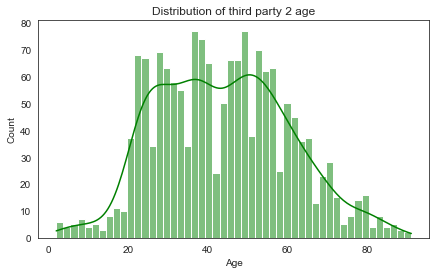

In [74]:
# histogram for third_party_age
sns.set_style('white')
ax = sns.histplot(x = 'third_party_2_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of third party 2 age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_third_party_2_age.png', bbox_inches = 'tight', dpi = 300)

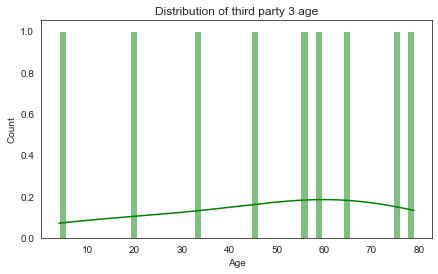

In [75]:
# histogram for third_party_age
sns.set_style('white')
ax = sns.histplot(x = 'third_party_3_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of third party 3 age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_third_party_3_age.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Policy Coverage</font>**
 - <font color='blue'> *policy_coverage_1000* consists of quite many missing values. So, we disuss it in a separate section.</font>

count    27043.000000
mean        21.537255
std         10.824431
min          1.000000
25%         14.000000
50%         19.000000
75%         26.000000
max        148.000000
Name: policy_coverage_1000, dtype: float64


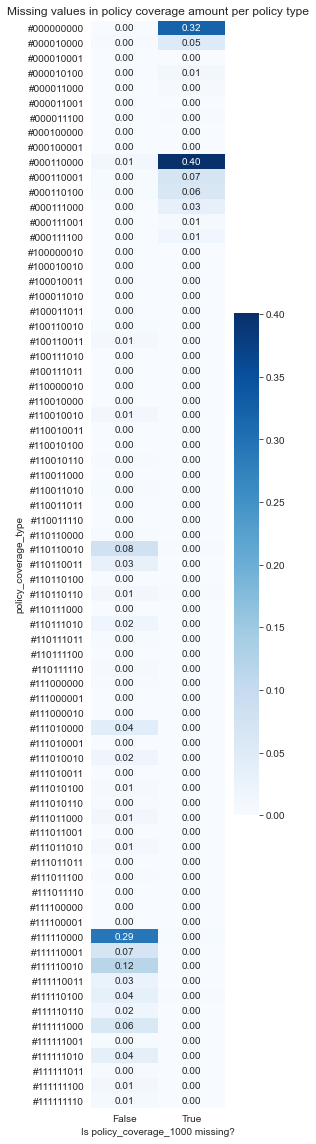

In [111]:
# Distribution of policy_coverage_1000
print(data['policy_coverage_1000'].describe())

# 2-ways frequency table for policy_coverage_1000 and policy_coverage_type
table_policy_coverage = pd.crosstab(data['policy_coverage_type'], 
                  data['policy_coverage_1000'].isna(), normalize = 'columns')
# heatmap
ax = sns.heatmap(table_policy_coverage, annot = True, fmt = '.2f',
                 yticklabels = True, cmap = 'Blues')
ax.set_title('Missing values in policy coverage amount per policy type')
ax.set_xlabel('Is policy_coverage_1000 missing?')
fig = ax.get_figure()
fig.set_size_inches(3, 20)
fig.savefig('dist_policy_coverage.png', bbox_inches = 'tight', dpi = 300)

In [185]:
# For policy_coverage_type, only these postal codes are included. Remaining types are categorized as 'other'
data[data['fraud'] == 'Y']['policy_coverage_type'].value_counts().head(21)

#111110000    56
#000110000    38
#000000000    38
#111110001    25
#110110010    20
#111110010    17
#111110100    13
#110110011    11
#111111000    10
#111110011    10
#000110001     7
#000010000     6
#111010000     6
#110010010     4
#110111010     4
#111111010     4
#000110100     3
#111000000     3
#111010010     3
#000111000     3
#111011000     3
Name: policy_coverage_type, dtype: int64

In [232]:
data.sample(1)['policy_coverage_type'].values 

array(['#110010011'], dtype=object)

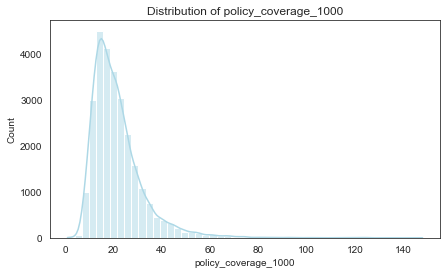

In [223]:
# heatmap
ax = sns.histplot(x = 'policy_coverage_1000', data = data, kde = True, 
                  color = 'lightblue',  bins = 50)
ax.set_title('Distribution of policy_coverage_1000')
ax.set_xlabel('policy_coverage_1000')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_policy_coverage_1000.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Distributions of Postal code</font>**

In [139]:
# Count of postal code
print(data['claim_postal_code'].value_counts().index.shape,
    data['policy_holder_postal_code'].value_counts().index.shape,
    data['driver_postal_code'].value_counts().index.shape,
    data['third_party_1_postal_code'].value_counts().index.shape,
    data['third_party_2_postal_code'].value_counts().index.shape,
    data['third_party_3_postal_code'].value_counts().index.shape,
    data['repair_postal_code'].value_counts().index.shape)

(1060,) (1082,) (1077,) (1088,) (750,) (27,) (754,)


In [208]:
# For claim_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['claim_postal_code'].value_counts().head(20)

7700    17
1000     7
4020     4
8500     4
9000     4
2000     4
2100     4
1210     4
4430     3
5000     3
9140     3
3600     3
6900     3
3520     3
8400     3
3560     3
6030     3
3590     3
4100     3
4000     3
Name: claim_postal_code, dtype: int64

In [156]:
# For policy_holder_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['policy_holder_postal_code'].value_counts().head(20)

7700    16
4020     5
8500     4
6900     4
3530     4
8020     3
3520     3
9140     3
9000     3
2140     3
4540     3
3560     3
2440     3
4100     3
6001     3
4430     3
2170     3
1070     3
5030     3
5590     3
Name: policy_holder_postal_code, dtype: int64

In [158]:
# For driver_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['driver_postal_code'].value_counts().head(18)

7700    16
4020     6
8500     5
2440     4
6900     4
8020     4
4100     3
3560     3
5590     3
5660     3
3530     3
5030     3
5380     3
4540     3
3930     3
5530     3
8501     3
4430     3
Name: driver_postal_code, dtype: int64

In [179]:
# For third_party_1_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['third_party_1_postal_code'].value_counts().head(16)

unknown    181
9000         3
8400         3
4100         2
2660         2
4040         2
8510         2
7784         2
8020         2
9140         2
8800         2
1070         2
3583         2
3560         2
6120         2
3400         2
Name: third_party_1_postal_code, dtype: int64

In [166]:
# For third_party_2_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['third_party_2_postal_code'].value_counts().head(18)

unknown    297
7170         1
3630         1
9090         1
9880         1
8600         1
3510         1
2500         1
9230         1
7141         1
8970         1
9040         1
Name: third_party_2_postal_code, dtype: int64

In [169]:
# For third_party_3_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['third_party_3_postal_code'].value_counts().head(18)

unknown    308
Name: third_party_3_postal_code, dtype: int64

In [175]:
# For repair_postal_code, only these postal codes are included. Remaining postal codes are categorized as 'other'
data[data['fraud'] == 'Y']['repair_postal_code'].value_counts().head(21)

unknown    154
1731        13
8500         7
7700         6
1030         3
7780         3
4500         3
7500         3
6200         3
5030         3
9300         2
8530         2
4020         2
7033         2
6040         2
8400         2
6000         2
2880         2
2960         2
1180         2
2630         2
Name: repair_postal_code, dtype: int64

 **<font color='blue'>Vehicle brand</font>**

In [191]:
data[data['fraud'] == 'Y']['claim_vehicle_brand'].value_counts().head(22)

unknown       46
BMW           31
VOLKSWAGEN    27
CITROEN       22
MERCEDES      20
PEUGEOT       19
OPEL          17
RENAULT       16
FORD          16
AUDI          16
FIAT          12
DACIA          9
KIA            7
TOYOTA         6
MINI           6
HYUNDAI        6
NISSAN         6
VOLVO          4
SKODA          4
SUZUKI         3
ALFA ROMEO     3
SEAT           3
Name: claim_vehicle_brand, dtype: int64

 **<font color='blue'>Correlation analysis with continuous variables</font>**
 - <font color='blue'>*claim_vehicle_cyl* is highly correlated with *claim_vehicle_power* and *policy_coverage_1000*.</font>
 - <font color='blue'>*policy_coverage_1000* is also highly correlated with *claim_vehicle_power*.</font>
 - <font color='blue'>*policy_holder_age* is also highly correlated with *driver_age*.</font>

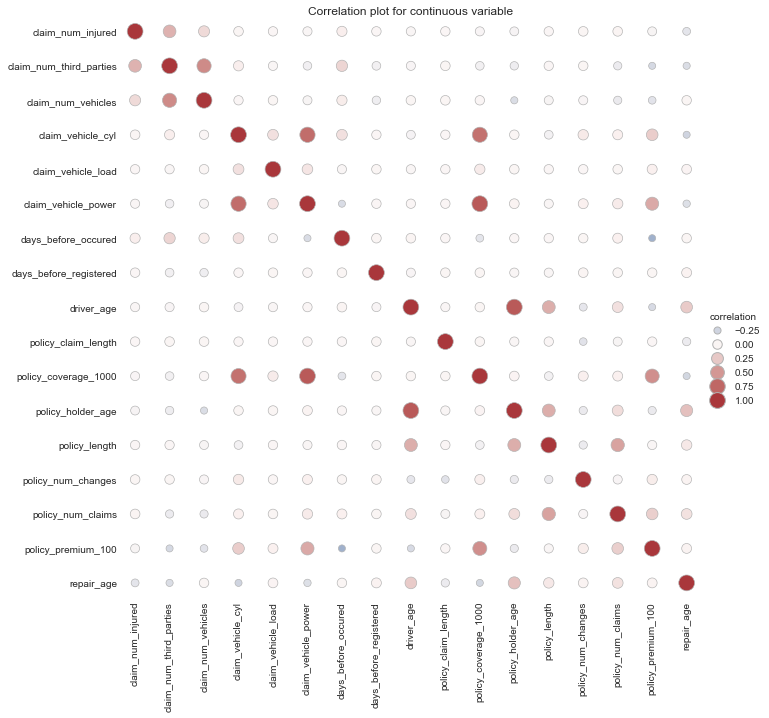

In [48]:
data_cont = data[['claim_num_injured', 'claim_num_third_parties', 'claim_num_vehicles', 'claim_vehicle_cyl', 'claim_vehicle_load',
                 'claim_vehicle_power', 'days_before_occured', 'days_before_registered', 'driver_age', 'policy_claim_length',
                 'policy_coverage_1000', 'policy_holder_age', 'policy_length', 'policy_num_changes', 'policy_num_claims', 
                 'policy_premium_100', 'repair_age']]
# Unfold correlation matrix, and create correlation plot
corr_mat = data_cont.corr().stack().reset_index(name = 'correlation')
ax = sns.relplot(data = corr_mat,
    x = 'level_0', y = 'level_1', hue = 'correlation', size = 'correlation',
    palette = 'vlag', hue_norm = (-1, 1), edgecolor = '.7',
    height = 10, sizes = (50, 250), size_norm = (-.2, .8))

# Tweak the figure to finalize
ax.set(xlabel = '', ylabel = '', aspect = 'equal', title = 'Correlation plot for continuous variable')
ax.despine(left = True, bottom = True)
ax.ax.margins(.02)
for label in ax.ax.get_xticklabels():
    label.set_rotation(90)
for artist in ax.legend.legendHandles:
    artist.set_edgecolor('.7')
            
ax.savefig('corr_plot.png', bbox_inches = 'tight', dpi = 300)

In [33]:
data.head()

,claim_id,claim_alcohol,claim_amount,claim_cause,claim_language,claim_liable,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_police,claim_postal_code,claim_time_occured,claim_vehicle_brand,claim_vehicle_cyl,claim_vehicle_fuel_type,claim_vehicle_id_known,claim_vehicle_load,claim_vehicle_power,claim_vehicle_type,days_before_occured,days_before_registered,driver_age,driver_country,driver_expert_id_known,driver_form,driver_injured,driver_postal_code,fraud,policy_claim_length,policy_coverage_1000,policy_coverage_type,policy_holder_age,policy_holder_country,policy_holder_expert_id_known,policy_holder_form,policy_holder_postal_code,policy_length,policy_num_changes,policy_num_claims,policy_premium_100,repair_age,repair_country,repair_form,repair_id_known,repair_postal_code,repair_sla,third_party_1_age,third_party_1_country,third_party_1_expert_id_known,third_party_1_form,third_party_1_id_known,third_party_1_injured,third_party_1_postal_code,third_party_1_vehicle_id_known,third_party_1_vehicle_type,third_party_2_age,third_party_2_country,third_party_2_expert_id_known,third_party_2_form,third_party_2_id_known,third_party_2_injured,third_party_2_postal_code,third_party_2_vehicle_id_known,third_party_2_vehicle_type,third_party_3_age,third_party_3_country,third_party_3_expert_id_known,third_party_3_form,third_party_3_id_known,third_party_3_injured,third_party_3_postal_code,third_party_3_vehicle_id_known,third_party_3_vehicle_type
0,10000,unknown,4895.00,traffic accident,2,Y,1,1,2,Y,2018,unknown,unknown,998.0,1,1,1.25,51.0,car,3225.0,3,35.0,B,0,F,N,2660,N,93.0,NaN,#000111000,35.0,B,0,F,2660,365.0,1,0,4.0,NaN,unknown,unknown,0,unknown,N,58.0,B,0,F,1,Y,9120,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
1,10001,unknown,3249.81,traffic accident,2,N,0,0,1,N,8820,unknown,unknown,NaN,1,0,NaN,NaN,car,1056.0,9,30.0,B,0,M,N,1730,N,NaN,NaN,#000000000,30.0,B,0,M,1730,NaN,0,0,NaN,NaN,B,C,1,1861,Y,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
2,10002,unknown,3242.89,traffic accident,2,Y,0,1,2,N,1831,unknown,TOYOTA,3000.0,1,1,3.30,175.0,van,4593.0,4,45.0,B,0,M,N,9200,N,94.0,58.0,#111110000,45.0,B,0,M,9200,3653.0,0,0,20.0,NaN,unknown,unknown,0,unknown,N,NaN,B,0,C,1,N,8510,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
3,10003,unknown,2687.00,traffic accident,2,Y,0,1,3,N,2610,unknown,PEUGEOT,1868.0,2,1,1.59,51.0,car,6054.0,4,71.0,B,0,M,N,2610,N,216.0,NaN,#000110000,71.0,B,0,M,2610,6940.0,0,8,4.0,NaN,unknown,unknown,0,unknown,N,NaN,B,1,C,1,N,2845,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
4,10004,unknown,2084.45,traffic accident,1,Y,0,1,3,N,1210,unknown,MITSUBISHI,1499.0,1,1,1.46,80.0,car,3041.0,3,59.0,B,0,M,N,7340,N,215.0,15.0,#111110110,32.0,B,0,F,7340,4018.0,0,9,19.0,NaN,unknown,unknown,0,unknown,N,NaN,B,0,M,1,N,7340,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown


 **<font color='blue'>Overview of missing data</font>**
 - <font color='blue'>After data cleaning, some missing values are treated as an individual category called "unknown". The variables which have the highest proportion of missing value are age factors, more than 80% are missing.</font>
 - <font color='blue'>Apart from age, the variable *policy_coverage_1000* has about 50% missing observations.</font>
 - <font color='blue'>For other variables, there are about 10% to 20% of data are missing.</font>

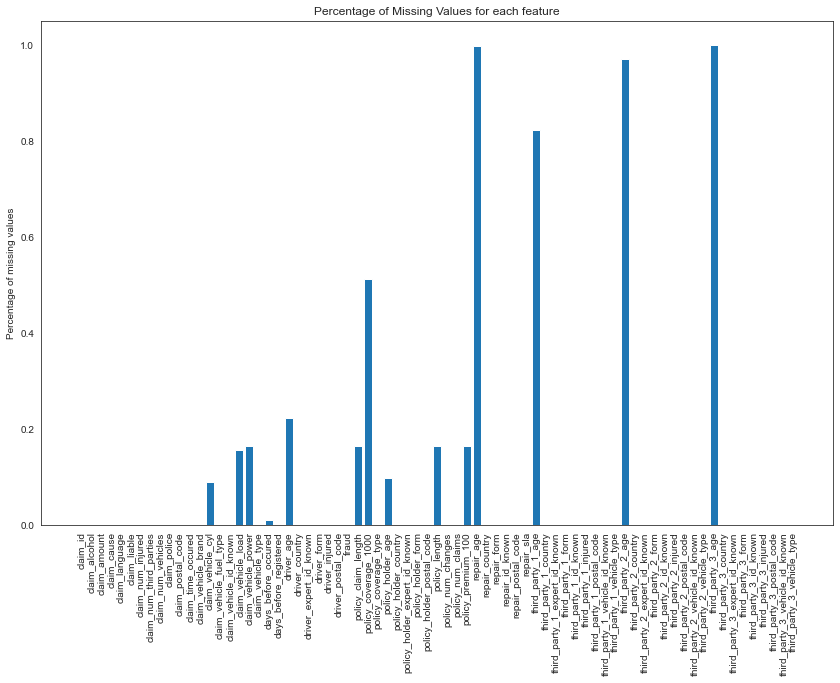

In [6]:
# Missing value in percentage
missing = pd.DataFrame(data.isna().sum()).T
missing /= data.shape[0]
missing

# Barplot for missing values
plt.rcParams['figure.figsize'] = [11, 7]
labels = missing.columns.tolist()
x = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, missing.values.tolist()[0])
plt.xticks(x + 0.5, labels)
ax.set_xticklabels(labels, rotation = 90, ha = 'right');
ax.set_ylabel('Percentage of missing values');
ax.set_title('Percentage of Missing Values for each feature');

Weight of evidence coding

In [290]:
tab = pd.crosstab(data['claim_time_occured'], data['fraud'])
tab['all'] = tab[['Y', 'N']].sum(axis = 1) 
tab['share'] = tab['all'] / tab['all'].sum(axis = 0)
tab['Y_rate'] = tab['Y'] / tab['all']
tab['N_dist'] = tab['N'] / tab['N'].sum()
tab['Y_dist'] = tab['Y'] / tab['Y'].sum()
tab['WoE'] = np.log(tab['N_dist'] / tab['Y_dist'])
tab = tab.replace({'WoE': {np.inf: 0, -np.inf: 0}})
tab['IV'] = tab['WoE'] * (tab['N_dist'] - tab['Y_dist'])

In [291]:
tab[np.abs(tab['IV']) > 0.01]

fraud,N,Y,all,share,Y_rate,N_dist,Y_dist,WoE,IV
claim_time_occured,,,,,,,,,
1-2,56,2,58,0.001046,0.034483,0.001015,0.006494,-1.855598,0.010165
20-21,206,4,210,0.003786,0.019048,0.003735,0.012987,-1.246221,0.011530
21-22,116,4,120,0.002164,0.033333,0.002103,0.012987,-1.820507,0.019814
22-23,130,6,136,0.002452,0.044118,0.002357,0.019481,-2.112028,0.036165
3-4,38,7,45,0.000811,0.155556,0.000689,0.022727,-3.496127,0.077049
4-5,36,2,38,0.000685,0.052632,0.000653,0.006494,-2.297431,0.013419
5-6,42,2,44,0.000793,0.045455,0.000761,0.006494,-2.143280,0.012285
7-8,202,4,206,0.003714,0.019417,0.003662,0.012987,-1.265830,0.011803


In [286]:
tab

fraud,N,Y,all,share,Y_rate,N_dist,Y_dist,WoE,IV
claim_time_occured,,,,,,,,,
0-3,163,3,166,0.002993,0.018072,0.002955,0.009740,-1.192665,0.008092
12-15,1300,4,1304,0.023511,0.003067,0.023570,0.012987,0.596022,0.006308
15-18,1608,5,1613,0.029082,0.003100,0.029154,0.016234,0.585506,0.007565
18-21,1014,5,1019,0.018373,0.004907,0.018385,0.016234,0.124417,0.000268
21-24,318,11,329,0.005932,0.033435,0.005766,0.035714,-1.823647,0.054616
3-6,116,11,127,0.002290,0.086614,0.002103,0.035714,-2.832108,0.095190
6-9,730,9,739,0.013324,0.012179,0.013235,0.029221,-0.791983,0.012660
9-12,1153,3,1156,0.020843,0.002595,0.020905,0.009740,0.763707,0.008526
unknown,48753,257,49010,0.883652,0.005244,0.883927,0.834416,0.057643,0.002854
